## 보스턴 부동산 데이터의 특징들(Features)
1. CRIM: 도시별 범죄발생률
2. ZN: 25,000평을 넘는 토지의 비율
3. INDUS: 도시별 비상업 지구의 비유
4. CHAS: 찰스 강의 더미 변수(1 = 강의 경계, 0 = 나머지)
5. NOX: 일산화질소 농도
6. RM: 주거할 수 있는 평균 방의개수
7. AGE: 1940년 이전에 지어진 주택의 비율
8. DIS: 5개의 고용지원센터까지의 가중치가 고려된 거리
9. RAD: 고속도로의 접근 용이성에 대한 지표
10. TAX: 10,000달러당 재산세 비율
11. PTRATIO: 도시별 교사와 학생의 비율 
12. B: 도시의 흑인 거주 비유
13. LSTAT: 저소득층의 비율

In [1]:
# 패키지 불러오기 
import pandas as pd     # pandas
import matplotlib.pyplot as plt  # matplotlib
import seaborn as sns   # seaborn
from sklearn.datasets import load_boston   # sklean에서 제공하는 보스턴 집값 기본 데이터 
import numpy as np   # numpy
from sklearn.linear_model import LinearRegression   # sklean LinearRegression
from sklearn.model_selection import train_test_split   # sklean train test split
from sklearn.metrics import mean_squared_error   # sklearn mean squared error

In [2]:
np.random.seed(42)

In [3]:
# sklearn에서 제공하는 보스턴 집값 데이터 불러오기
boston_house_data = load_boston()
boston_house_data

{'data': array([[6.3200e-03, 1.8000e+01, 2.3100e+00, ..., 1.5300e+01, 3.9690e+02,
         4.9800e+00],
        [2.7310e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9690e+02,
         9.1400e+00],
        [2.7290e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9283e+02,
         4.0300e+00],
        ...,
        [6.0760e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
         5.6400e+00],
        [1.0959e-01, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9345e+02,
         6.4800e+00],
        [4.7410e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
         7.8800e+00]]),
 'target': array([24. , 21.6, 34.7, 33.4, 36.2, 28.7, 22.9, 27.1, 16.5, 18.9, 15. ,
        18.9, 21.7, 20.4, 18.2, 19.9, 23.1, 17.5, 20.2, 18.2, 13.6, 19.6,
        15.2, 14.5, 15.6, 13.9, 16.6, 14.8, 18.4, 21. , 12.7, 14.5, 13.2,
        13.1, 13.5, 18.9, 20. , 21. , 24.7, 30.8, 34.9, 26.6, 25.3, 24.7,
        21.2, 19.3, 20. , 16.6, 14.4, 19.4, 19.7, 20.5, 25. , 23.4, 18.9,
        35.4, 24.7, 3

## 전체 특징(Feature)를 사용한 Linear Regression

In [4]:
# x데이터 - 데이터  y 데이터 - 타겟 설정 
X = boston_house_data.data
y = boston_house_data.target

In [5]:
type(X)

numpy.ndarray

In [7]:
from sklearn.model_selection import KFold

num_split = 5
kf = KFold(n_splits=num_split)

avg_MSE = 0.0
for train_index, test_index in kf.split(X):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]
  # 선형회귀(Linear Regression) 모델 선언하기
    lr = LinearRegression()
    
  # 선형회귀(Linear Regression) 모델 학습하기
    lr.fit(X_train, y_train)

  # 테스트 데이터에 대한 예측을 수행합니다.
    y_pred = lr.predict(X_test)

  # MSE(Mean Squared Error)를 측정합니다.
    avg_MSE = avg_MSE + mean_squared_error(y_test, y_pred)

print('Average MSE :', avg_MSE/num_split)
print('Avergae RMSE :', np.sqrt(avg_MSE/num_split))

Average MSE : 37.13180746769892
Avergae RMSE : 6.093587405436876


## 상관분석(Correlation Analysis)

In [8]:
boston_house_df = pd.DataFrame(boston_house_data.data, columns = boston_house_data.feature_names)
boston_house_df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [9]:
boston_house_df['PRICE'] = y
boston_house_df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


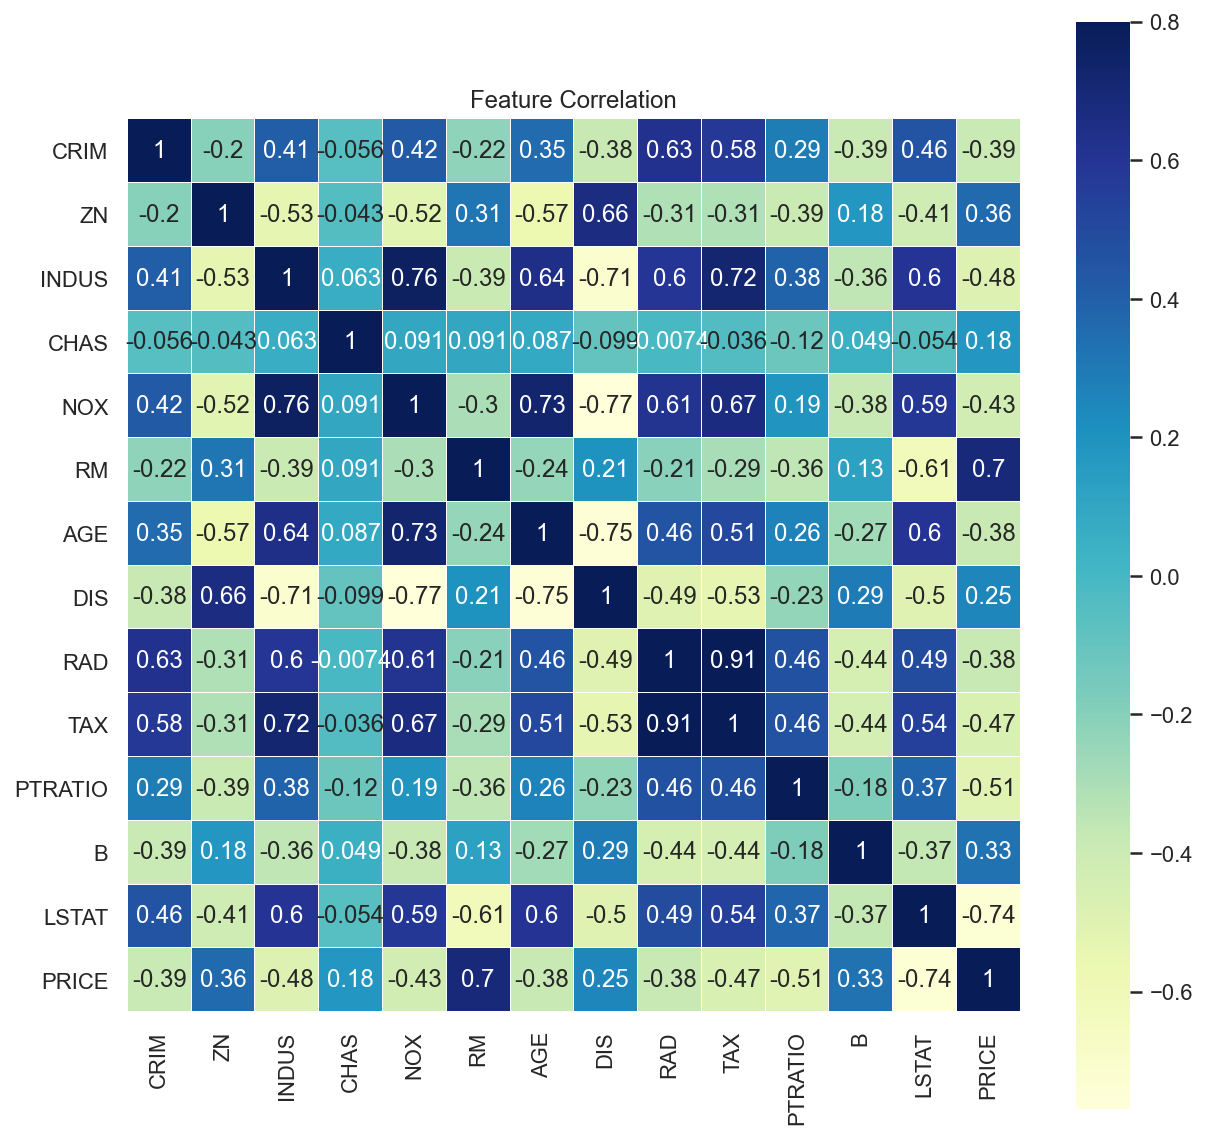

In [11]:
corr = boston_house_df.corr()
plt.figure(figsize=(10, 10));
sns.heatmap(corr,
            vmax=0.8,
            linewidths=0.01,
            square=True,
            annot=True,
            cmap='YlGnBu');
plt.title('Feature Correlation');

In [12]:
full_column_list = boston_house_df.columns.to_list()
full_column_list.remove('PRICE')
full_column_list

['CRIM',
 'ZN',
 'INDUS',
 'CHAS',
 'NOX',
 'RM',
 'AGE',
 'DIS',
 'RAD',
 'TAX',
 'PTRATIO',
 'B',
 'LSTAT']

In [13]:
len(full_column_list)

13

In [14]:
boston_house_df

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48,22.0


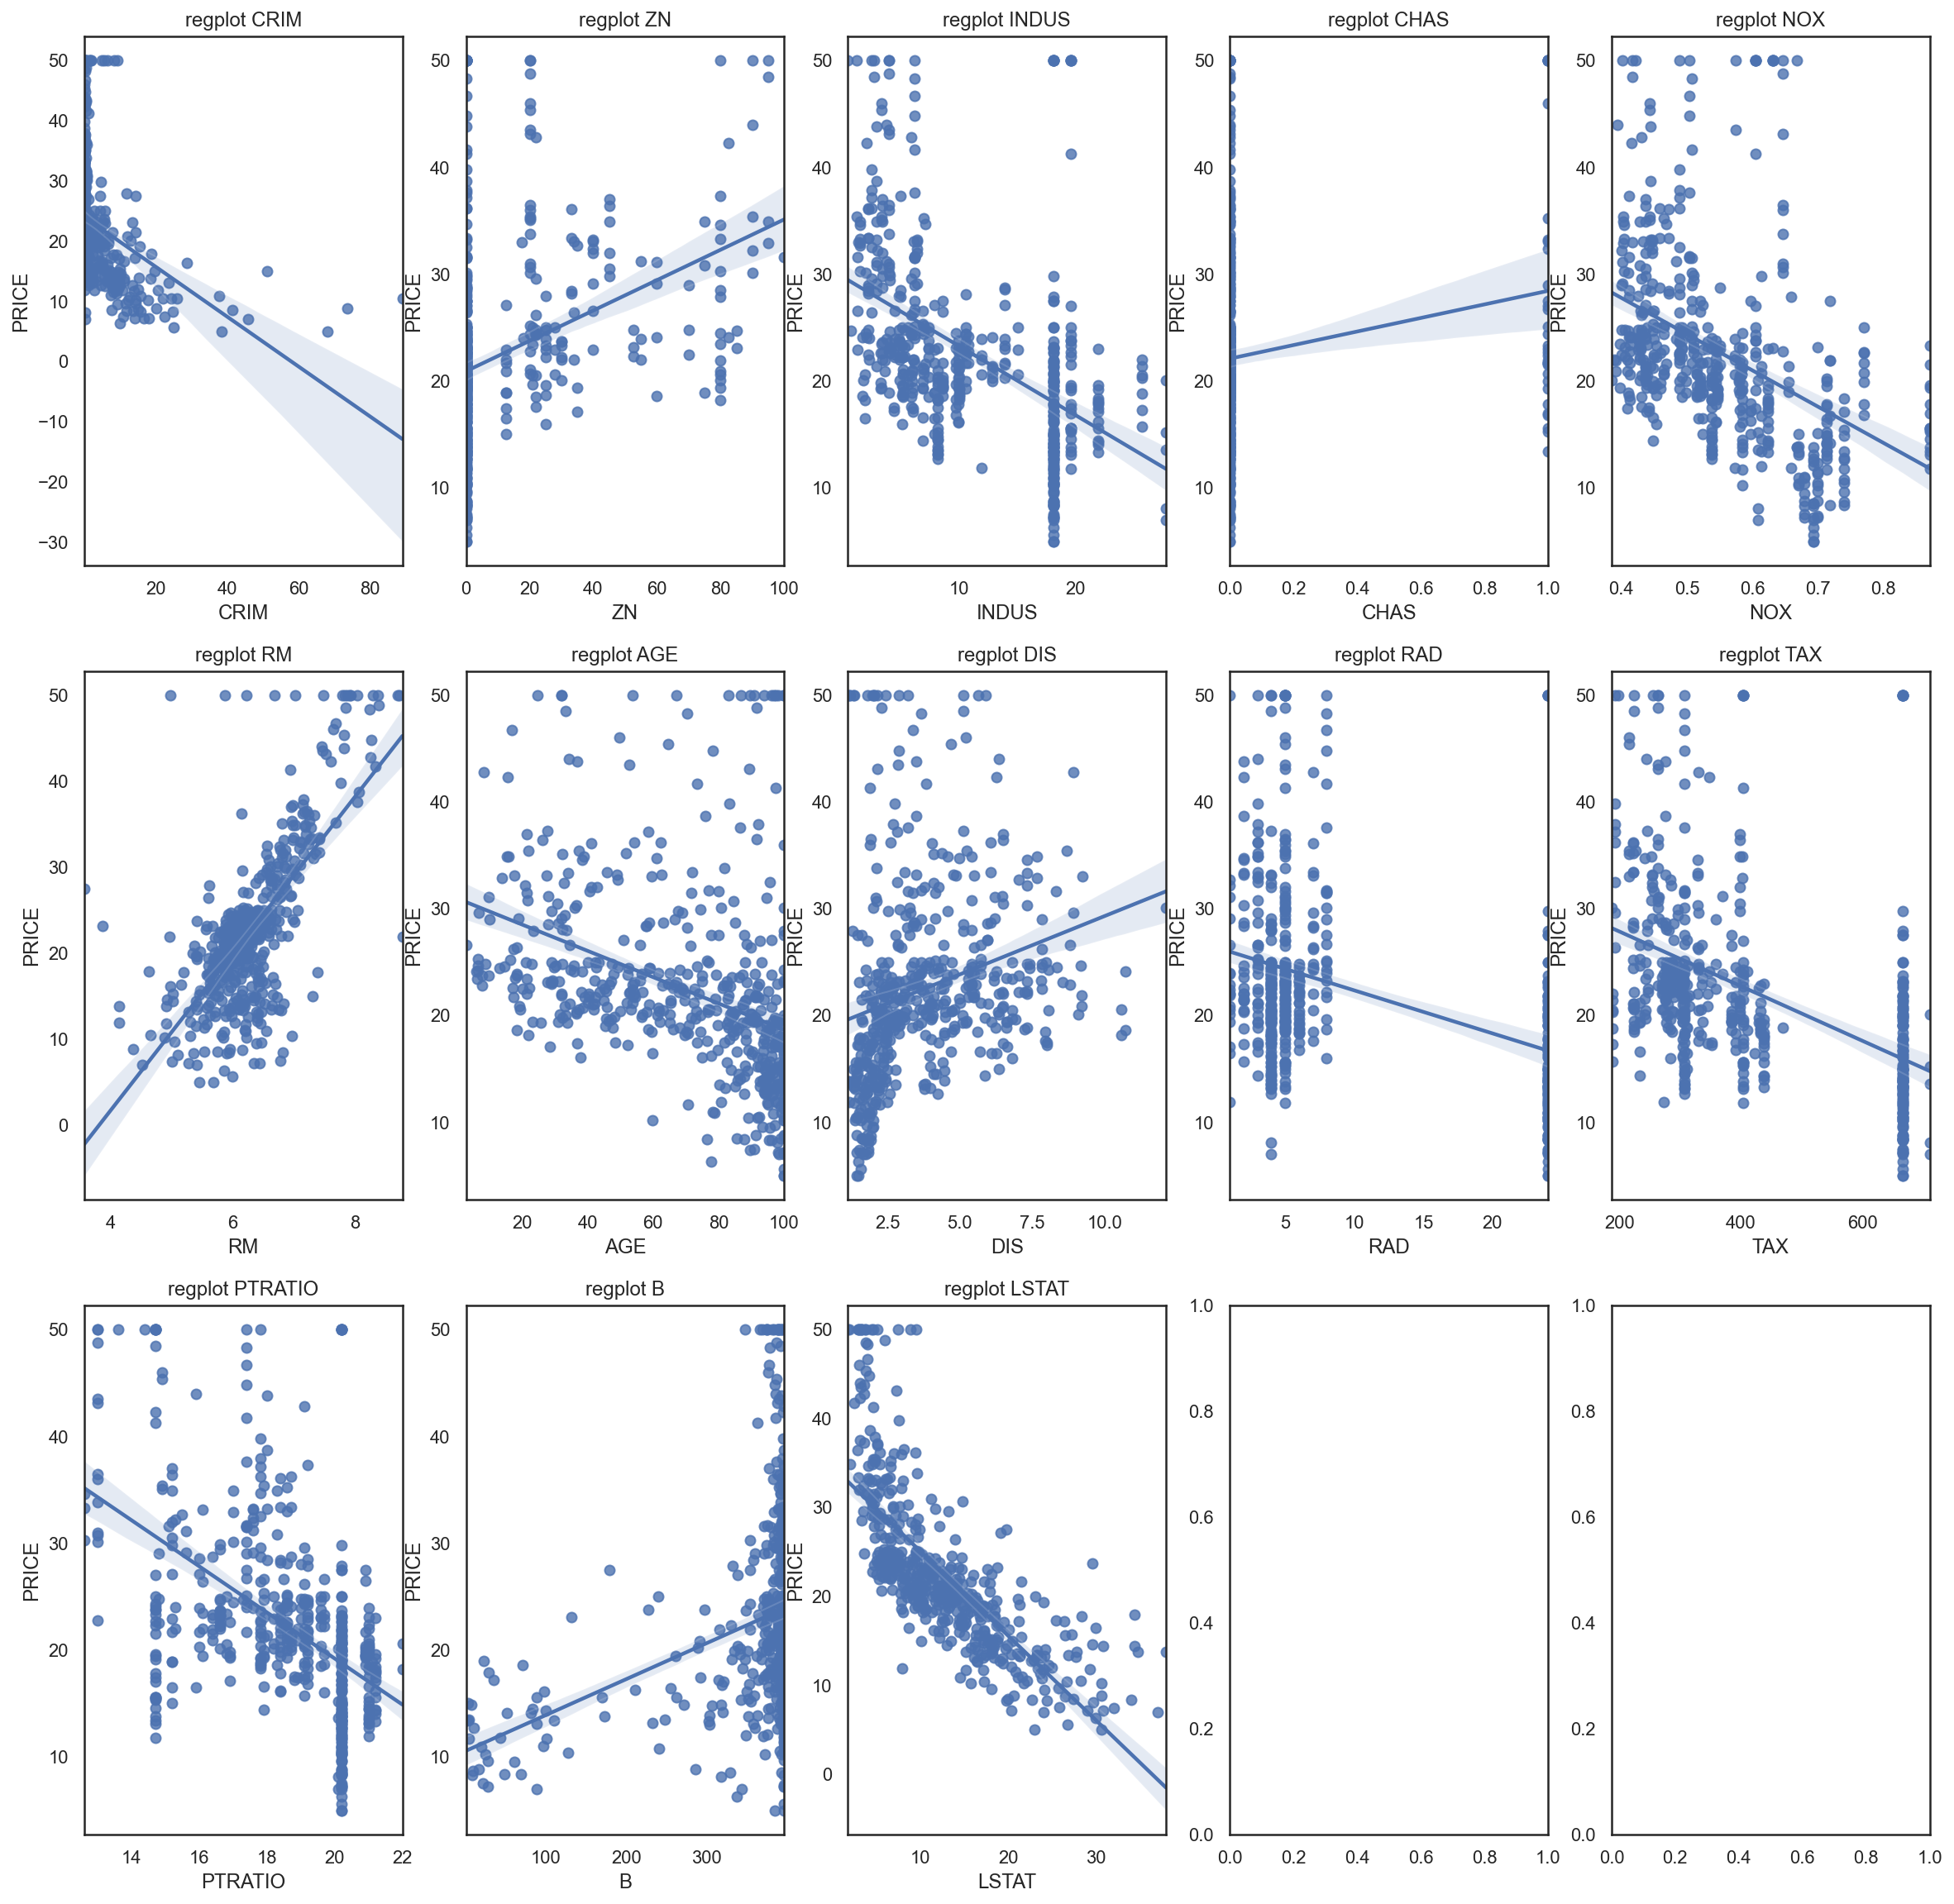

In [15]:
figure, ax_list = plt.subplots(nrows=3, ncols=5)
figure.set_size_inches(20,20) 
for i in range(len(full_column_list)): 
    sns.regplot(data=boston_house_df, x=full_column_list[i], y='PRICE', ax=ax_list[int(i/5)][int(i%5)]) 
    ax_list[int(i/5)][int(i%5)].set_title("regplot " + full_column_list[i])

## 유의미한 Feature들만을 남기는 Feature Selection

In [17]:
print(type(corr))
corr

<class 'pandas.core.frame.DataFrame'>


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
CRIM,1.000000,-0.200469,0.406583,-0.055892,0.420972,-0.219247,0.352734,-0.379670,0.625505,0.582764,0.289946,-0.385064,0.455621,-0.388305
ZN,-0.200469,1.000000,-0.533828,-0.042697,-0.516604,0.311991,-0.569537,0.664408,-0.311948,-0.314563,-0.391679,0.175520,-0.412995,0.360445
INDUS,0.406583,-0.533828,1.000000,0.062938,0.763651,-0.391676,0.644779,-0.708027,0.595129,0.720760,0.383248,-0.356977,0.603800,-0.483725
CHAS,-0.055892,-0.042697,0.062938,1.000000,0.091203,0.091251,0.086518,-0.099176,-0.007368,-0.035587,-0.121515,0.048788,-0.053929,0.175260
NOX,0.420972,-0.516604,0.763651,0.091203,1.000000,-0.302188,0.731470,-0.769230,0.611441,0.668023,0.188933,-0.380051,0.590879,-0.427321
RM,-0.219247,0.311991,-0.391676,0.091251,-0.302188,1.000000,-0.240265,0.205246,-0.209847,-0.292048,-0.355501,0.128069,-0.613808,0.695360
AGE,0.352734,-0.569537,0.644779,0.086518,0.731470,-0.240265,1.000000,-0.747881,0.456022,0.506456,0.261515,-0.273534,0.602339,-0.376955
DIS,-0.379670,0.664408,-0.708027,-0.099176,-0.769230,0.205246,-0.747881,1.000000,-0.494588,-0.534432,-0.232471,0.291512,-0.496996,0.249929
RAD,0.625505,-0.311948,0.595129,-0.007368,0.611441,-0.209847,0.456022,-0.494588,1.000000,0.910228,0.464741,-0.444413,0.488676,-0.381626
TAX,0.582764,-0.314563,0.720760,-0.035587,0.668023,-0.292048,0.506456,-0.534432,0.910228,1.000000,0.460853,-0.441808,0.543993,-0.468536


In [18]:
useful_feature_list = corr.query("PRICE > 0.5 or PRICE < -0.5").index.values.tolist()
useful_feature_list.remove('PRICE')
print(useful_feature_list)

['RM', 'PTRATIO', 'LSTAT']


In [19]:
X = boston_house_df.loc[:,useful_feature_list].values
y = boston_house_df.iloc[:,-1].values

In [22]:
print(X.shape)
print(y.shape)

(506, 3)
(506,)


In [23]:
removed_column_list = list(set(full_column_list) - set(useful_feature_list))
print(removed_column_list)

['ZN', 'CRIM', 'RAD', 'DIS', 'INDUS', 'NOX', 'B', 'AGE', 'TAX', 'CHAS']


In [35]:
X

array([[ 6.575, 15.3  ,  4.98 ],
       [ 6.421, 17.8  ,  9.14 ],
       [ 7.185, 17.8  ,  4.03 ],
       ...,
       [ 6.976, 21.   ,  5.64 ],
       [ 6.794, 21.   ,  6.48 ],
       [ 6.03 , 21.   ,  7.88 ]])

In [36]:
X.shape

(506, 3)

In [37]:
y

array([24. , 21.6, 34.7, 33.4, 36.2, 28.7, 22.9, 27.1, 16.5, 18.9, 15. ,
       18.9, 21.7, 20.4, 18.2, 19.9, 23.1, 17.5, 20.2, 18.2, 13.6, 19.6,
       15.2, 14.5, 15.6, 13.9, 16.6, 14.8, 18.4, 21. , 12.7, 14.5, 13.2,
       13.1, 13.5, 18.9, 20. , 21. , 24.7, 30.8, 34.9, 26.6, 25.3, 24.7,
       21.2, 19.3, 20. , 16.6, 14.4, 19.4, 19.7, 20.5, 25. , 23.4, 18.9,
       35.4, 24.7, 31.6, 23.3, 19.6, 18.7, 16. , 22.2, 25. , 33. , 23.5,
       19.4, 22. , 17.4, 20.9, 24.2, 21.7, 22.8, 23.4, 24.1, 21.4, 20. ,
       20.8, 21.2, 20.3, 28. , 23.9, 24.8, 22.9, 23.9, 26.6, 22.5, 22.2,
       23.6, 28.7, 22.6, 22. , 22.9, 25. , 20.6, 28.4, 21.4, 38.7, 43.8,
       33.2, 27.5, 26.5, 18.6, 19.3, 20.1, 19.5, 19.5, 20.4, 19.8, 19.4,
       21.7, 22.8, 18.8, 18.7, 18.5, 18.3, 21.2, 19.2, 20.4, 19.3, 22. ,
       20.3, 20.5, 17.3, 18.8, 21.4, 15.7, 16.2, 18. , 14.3, 19.2, 19.6,
       23. , 18.4, 15.6, 18.1, 17.4, 17.1, 13.3, 17.8, 14. , 14.4, 13.4,
       15.6, 11.8, 13.8, 15.6, 14.6, 17.8, 15.4, 21

In [38]:
num_split = 5

kf = KFold(n_splits=num_split)

avg_MSE = 0.0

for train_index, test_index in kf.split(X):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]
  # 선형회귀(Linear Regression) 모델 선언하기
    lr = LinearRegression()

  # 선형회귀(Linear Regression) 모델 학습하기
    lr.fit(X_train, y_train)

  # 테스트 데이터에 대한 예측을 수행합니다.
    y_pred = lr.predict(X_test)

  # MSE(Mean Squared Error)를 측정합니다.
    avg_MSE = avg_MSE + mean_squared_error(y_test, y_pred)

print('Average MSE :', avg_MSE/num_split)
print('Avergae RMSE :', np.sqrt(avg_MSE/num_split))

Average MSE : 34.10008149030686
Avergae RMSE : 5.839527505741099
